**Crop Yield data exploration**

This notebook is intended to explore some data about crop yield in order to test the viability / relevance of a yield prediction project. 
The sample data comes from https://www.fao.org/faostat/en/#data/QCL
The sample data was chosen for certain crops (below described) in Portugal between 1961 and 2021

In [1]:
!pwd

/Users/williammilner/code/agritech-project/notebooks


In [5]:
data_path = '../data/crop_yield.csv'

In [16]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv(data_path)
data

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,620,Portugal,5312,Area harvested,112,Maize (corn),1961,1961,ha,494577.0,A,Official figure
1,QCL,Crops and livestock products,620,Portugal,5312,Area harvested,112,Maize (corn),1962,1962,ha,502880.0,A,Official figure
2,QCL,Crops and livestock products,620,Portugal,5312,Area harvested,112,Maize (corn),1963,1963,ha,487785.0,A,Official figure
3,QCL,Crops and livestock products,620,Portugal,5312,Area harvested,112,Maize (corn),1964,1964,ha,496000.0,A,Official figure
4,QCL,Crops and livestock products,620,Portugal,5312,Area harvested,112,Maize (corn),1965,1965,ha,483642.0,A,Official figure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,QCL,Crops and livestock products,620,Portugal,5510,Production,111,Wheat,2017,2017,t,59610.0,A,Official figure
680,QCL,Crops and livestock products,620,Portugal,5510,Production,111,Wheat,2018,2018,t,70110.0,A,Official figure
681,QCL,Crops and livestock products,620,Portugal,5510,Production,111,Wheat,2019,2019,t,77070.0,A,Official figure
682,QCL,Crops and livestock products,620,Portugal,5510,Production,111,Wheat,2020,2020,t,83500.0,A,Official figure


This data contains different metrics for different crops between 1961 and 2021.

Below we can see what crops are present in this dataset as well as which metrics are measured for each crop:

In [10]:
data['Item'].unique()

array(['Maize (corn)', 'Spinach', 'Strawberries', 'Wheat'], dtype=object)

In [11]:
data['Element'].unique()

array(['Area harvested', 'Yield', 'Production'], dtype=object)

In [14]:
spinach = data[data['Item'] == 'Spinach']

In [35]:
spinach_yield = spinach[spinach['Element'] == 'Yield']
spinach_yield

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
228,QCL,Crops and livestock products,620,Portugal,5419,Yield,1215,Spinach,1977,1977,100 g/ha,150000.0,E,Estimated value
229,QCL,Crops and livestock products,620,Portugal,5419,Yield,1215,Spinach,1978,1978,100 g/ha,154286.0,E,Estimated value
230,QCL,Crops and livestock products,620,Portugal,5419,Yield,1215,Spinach,1979,1979,100 g/ha,154286.0,E,Estimated value
231,QCL,Crops and livestock products,620,Portugal,5419,Yield,1215,Spinach,1980,1980,100 g/ha,157143.0,E,Estimated value
232,QCL,Crops and livestock products,620,Portugal,5419,Yield,1215,Spinach,1981,1981,100 g/ha,162857.0,E,Estimated value
233,QCL,Crops and livestock products,620,Portugal,5419,Yield,1215,Spinach,1982,1982,100 g/ha,157143.0,E,Estimated value
234,QCL,Crops and livestock products,620,Portugal,5419,Yield,1215,Spinach,1983,1983,100 g/ha,150000.0,E,Estimated value
235,QCL,Crops and livestock products,620,Portugal,5419,Yield,1215,Spinach,1984,1984,100 g/ha,152500.0,E,Estimated value
236,QCL,Crops and livestock products,620,Portugal,5419,Yield,1215,Spinach,1985,1985,100 g/ha,157500.0,E,Estimated value
237,QCL,Crops and livestock products,620,Portugal,5419,Yield,1215,Spinach,1986,1986,100 g/ha,200000.0,E,Estimated value


In [41]:
spinach_yield.drop(['Domain Code','Domain', 'Area Code (M49)', 'Element Code', 'Item Code (CPC)', 'Year Code', 'Flag'],axis=1, inplace=True)

/var/folders/qt/_fgj9h8171l1kgyc0hc61px00000gn/T/ipykernel_40555/1702160664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spinach_yield.drop(['Domain Code','Domain', 'Area Code (M49)', 'Element Code', 'Item Code (CPC)', 'Year Code', 'Flag'],axis=1, inplace=True)


In [43]:
spinach_yield.head()

,Area,Element,Item,Year,Unit,Value,Flag Description
228,Portugal,Yield,Spinach,1977,100 g/ha,150000.0,Estimated value
229,Portugal,Yield,Spinach,1978,100 g/ha,154286.0,Estimated value
230,Portugal,Yield,Spinach,1979,100 g/ha,154286.0,Estimated value
231,Portugal,Yield,Spinach,1980,100 g/ha,157143.0,Estimated value
232,Portugal,Yield,Spinach,1981,100 g/ha,162857.0,Estimated value


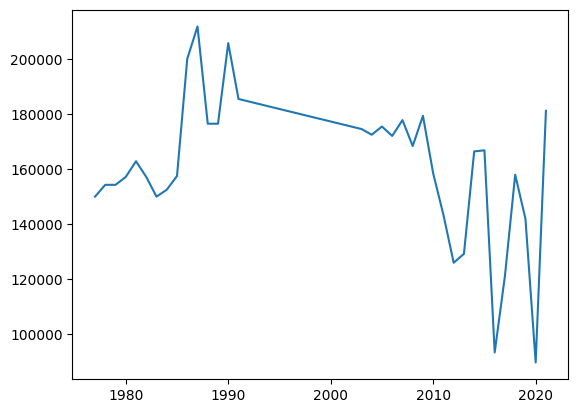

In [45]:
x = spinach_yield['Year']
y = spinach_yield['Value']
plt.plot(x,y)